In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gaussians import create_data, kullback_leibler
from losses import mmd_loss
from scikit_posthocs import posthoc_dunn

/home/unai/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/unai/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/unai/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/unai/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
sess = tf.compat.v1.Session()
candidate = tf.placeholder(tf.float32, shape=[392, 2])
target = tf.placeholder(tf.float32, shape=[1000, 2])

res = mmd_loss(candidate, target, 1)
sess.run(tf.global_variables_initializer())


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


INFO:tensorflow:Summary name MMD Loss is illegal; using MMD_Loss instead.



In [3]:
baseline = create_data()
baseline[:, 0] -= np.min(baseline[:, 0])
baseline[:, 1] -= np.min(baseline[:, 1])
baseline[:, 0] /= np.max(baseline[:, 0])
baseline[:, 1] /= np.max(baseline[:, 1])

0.0 1.0


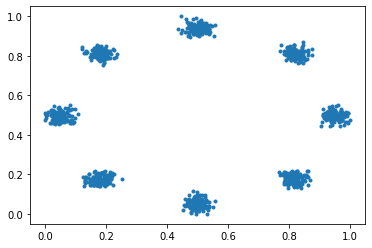

In [4]:
plt.plot(baseline[:, 0],baseline[:, 1], ".")
print(np.min(baseline), np.max(baseline))

In [5]:
methods = ['RMS','FTRL','Adagrad','Momentum','RMS_FTRL','FTRL_RMS']
model = 0
params = '_100_samp_10000_un_samples_'
fs = [0,1, 2, 3, 4, 5, 6, 7]
runs = range(0, 30)    

In [6]:
#print(16*392,len(C))

## Check which experiments are available

In [10]:
results = np.zeros((len(methods), len(fs), len(runs), 17, 2))
for im, method in enumerate(methods):
    print(method)
    for fi in fs:
        print("\tF " + str(fi))
        for run in runs:
            print("\t\tRun " + str(run))
            fname = method+'/'+method+params+str(fi)+'_'+str(run)+'.npy'
            C = np.load(fname)    
            # Below there are 16 matrices for each combination 
            for k in range(1,2):
                #ax1=plt.subplot(4, 4, k)
                auxC = C[392*(k-1):392*k,:]
                print(np.isnan(auxC).any())
                auxC[:, 0] -= np.min(auxC[:, 0])
                auxC[:, 1] -= np.min(auxC[:, 1])
                auxC[:, 0] /= np.max(auxC[:, 0])
                auxC[:, 1] /= np.max(auxC[:, 1])
                
                #result = sess.run(res, feed_dict={target: baseline.astype("float32"), candidate: auxC.astype("float32")})
                #if result < 0.00001:
                    #result = 10
                #results[im, fi, run, k-1] = [kullback_leibler(baseline, auxC)[0], result]
                #plt.plot(auxC[:,0], auxC[:,1],'g.')
np.save("DistanceResultsNormalized.npy", results)
sess.close()

RMS
	F 0
		Run 0
False
		Run 1
False
		Run 2
False
		Run 3
False
		Run 4
False
		Run 5
False
		Run 6
True
		Run 7
False
		Run 8
False
		Run 9
True
		Run 10
False
		Run 11
False
		Run 12
False
		Run 13
False
		Run 14
False
		Run 15
True
		Run 16
False
		Run 17
False
		Run 18
False
		Run 19
False
		Run 20
False
		Run 21
False
		Run 22
True
		Run 23
False
		Run 24
False
		Run 25
False
		Run 26
True
		Run 27
False
		Run 28
False
		Run 29
False
	F 1
		Run 0
False
		Run 1
False
		Run 2
False
		Run 3
False
		Run 4
True
		Run 5
False
		Run 6
False
		Run 7
False
		Run 8
False
		Run 9
False
		Run 10
False
		Run 11
False
		Run 12
False
		Run 13
False
		Run 14
False
		Run 15
False
		Run 16
False
		Run 17
False
		Run 18
False
		Run 19
False
		Run 20
False
		Run 21
True
		Run 22
True
		Run 23
False
		Run 24
False
		Run 25
False
		Run 26
False
		Run 27
False
		Run 28
True
		Run 29
False
	F 2
		Run 0
False
		Run 1
False
		Run 2
False
		Run 3
False
		Run 4
False
		Run 5
False
		Run 6
False
		Run 7
Fals

/home/unai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/unai/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


False
		Run 29
False
	F 1
		Run 0
False
		Run 1
False
		Run 2
False
		Run 3
False
		Run 4
False
		Run 5
False
		Run 6
False
		Run 7
False
		Run 8
False
		Run 9
False
		Run 10
False
		Run 11
False
		Run 12
False
		Run 13
False
		Run 14
False
		Run 15
False
		Run 16
False
		Run 17
False
		Run 18
False
		Run 19
False
		Run 20
False
		Run 21
False
		Run 22
False
		Run 23
False
		Run 24
False
		Run 25
False
		Run 26
False
		Run 27
False
		Run 28
False
		Run 29
False
	F 2
		Run 0
False
		Run 1
False
		Run 2
False
		Run 3
False
		Run 4
False
		Run 5
False
		Run 6
False
		Run 7
False
		Run 8
False
		Run 9
False
		Run 10
False
		Run 11
False
		Run 12
False
		Run 13
False
		Run 14
False
		Run 15
False
		Run 16
False
		Run 17
False
		Run 18
False
		Run 19
False
		Run 20
False
		Run 21
False
		Run 22
False
		Run 23
False
		Run 24
False
		Run 25
False
		Run 26
False
		Run 27
False
		Run 28
False
		Run 29
False
	F 3
		Run 0
False
		Run 1
False
		Run 2
False
		Run 3
False
		Run 4
False
		Run 5
False


In [11]:
data = np.load("DistanceResults.npy")
data_norm = np.load("DistanceResultsNormalized.npy")
data = data.transpose(1,0,4,2,3)
data_norm = data_norm.transpose(1,0,4,2,3)
print(data.shape)
print(data_norm.shape)

(8, 6, 2, 30, 17)
(8, 6, 2, 30, 17)


In [12]:
prueba = np.reshape(data, (8,6,2,30*17))
prueba_norm = np.reshape(data_norm, (8,6,2,30*17))

In [13]:
vars_prueba = np.var(prueba, axis=3)
means_prueba = np.mean(prueba, axis=3)

vars_prueba_norm = np.var(prueba_norm, axis=3)
means_prueba_norm = np.mean(prueba_norm, axis=3)

In [14]:
print(vars_prueba.shape)
print(vars_prueba_norm.shape)

(8, 6, 2)
(8, 6, 2)


In [15]:
print(means_prueba.shape)
print(means_prueba_norm.shape)

(8, 6, 2)
(8, 6, 2)


In [16]:
#vars_prueba = np.reshape(vars_prueba, (8,12))
#means_prueba = np.reshape(means_prueba, (8,12))

In [17]:
import seaborn as sns

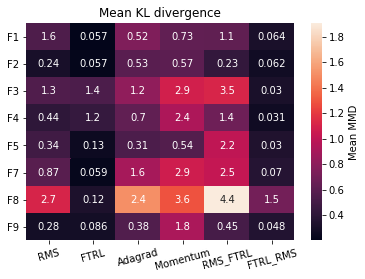

In [18]:
sns.heatmap(means_prueba_norm[:, :, 1], annot=vars_prueba_norm[:, :, 1], cbar_kws={'label': 'Mean MMD'})

plt.yticks(np.arange(0.5,8.5), ["F" + str(i) for i in [1, 2, 3, 4, 5, 7, 8, 9]], rotation=0)
plt.xticks(np.arange(0.5,6.5), methods, rotation=15)
plt.ylim((8, 0))
plt.title("Mean KL divergence")
plt.savefig("KL.pdf")

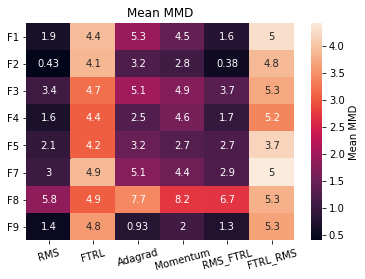

In [19]:
sns.heatmap(means_prueba[:, :, 1], annot=vars_prueba[:, :, 1], cbar_kws={'label': 'Mean MMD'})

plt.yticks(np.arange(0.5,8.5), ["F" + str(i) for i in [1, 2, 3, 4, 5, 7, 8, 9]], rotation=0)
plt.xticks(np.arange(0.5,6.5), methods, rotation=15)
plt.ylim((8, 0))
plt.title("Mean MMD")
plt.savefig("MMD.pdf")

In [20]:
def scatter_heat(data, data1, title=""):  # Origin Function, Instance, Target Function, Repetition, Metric


    grid_x_offset = np.array([[i]*data.shape[0] for i in range(data.shape[1])]).flatten()
    grid_x = np.array([[i]*data.shape[0] for i in range(data.shape[1])]).flatten()
    grid_y = np.array([[i]*data.shape[1] for i in range(data.shape[0])]).transpose().flatten()

    means1 = np.mean(data1, axis=(2, 3))
    variances1 = np.var(data1, axis=(2, 3))
    means = np.mean(data, axis=(2, 3))
    variances = np.var(data, axis=(2, 3))
    # mean = np.mean(np.log(variances))

    f, ax = plt.subplots()

    jj = ax.scatter(x=grid_x_offset, y=grid_y, c=np.log(variances.T.flatten()), s=means.flatten()*350, marker=8, cmap="viridis")
    jj = ax.scatter(x=grid_x_offset, y=grid_y, c=np.log(variances1.T.flatten()), s=means1.flatten()*350, marker=9, cmap="viridis")
    grid_x_offset = np.unique(grid_x_offset)
    plt.subplots_adjust(hspace=0, wspace=0, left=0.08, right=1, bottom=0.1, top=0.94)
    plt.title(title)

    for x, y in zip(grid_x, grid_y):
        plt.text(s="%.2f" % means[y, x], x=grid_x_offset[x]-0.2, y=y, horizontalalignment='center', verticalalignment='center', color="white" if np.log(variances[y, x]) < 2.4 else "black", fontsize=10)  # 2.5
        plt.text(s="%.2f" % means1[y, x], x=grid_x_offset[x]+0.2, y=y, horizontalalignment='center', verticalalignment='center', color="black" if np.log(variances1[y, x]) < 0.4 else "black", fontsize=10)  # 2.5
    plt.xticks(range(6), methods)
    plt.yticks([])
    plt.yticks(range(8), ["F" + str(i) for i in fs])
    plt.xlabel("Optimizer")
    plt.ylabel("Function")
    print(plt.xlim(-0.8, 5.5))
    f.colorbar(mappable=jj, label=r"$log(var)$ values")

    plt.show()

In [21]:
data[:, :, 0, :, :].shape

(8, 6, 30, 17)

(-0.8, 5.5)


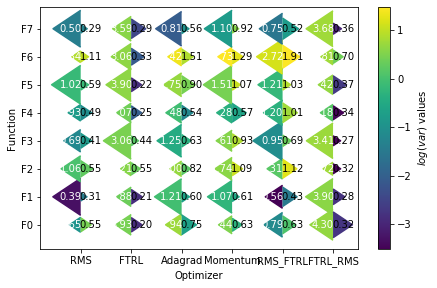

In [22]:
scatter_heat(data[:, :, 1, :, :], data_norm[:, :, 1, :, :])

## Visualization of the single optimizers ('RMS','FTRL','Adagrad','Momentum')

In [ ]:
sns.set(rc={'figure.figsize':(8,16),"font.size":8,"axes.titlesize":8,"axes.labelsize":8},style="ticks")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots(4, 2)
#plt.subplots_adjust(wspace=0, hspace=0)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
#g.axes.get_legend().set_title('Temperature')


for im, method in enumerate(['RMS','FTRL','Adagrad','Momentum']): # ,'RMS_FTRL','FTRL_RMS'
    for fi in [0,1]:
        for irun, run in enumerate([3]):
            fname = method+'/'+method+params+str(fi)+'_'+str(run)+'.npy'
            C = np.load(fname) 
            auxC = C[392:784,:]
            #print(auxC)
            ax[im, fi].plot(auxC[:,0], auxC[:,1],'g.')
            #ax[im, fi*2+run].ylim((0,1))
            #ax[im, fi*2+run].xlim((0,1))
fig.show()
#ax.set(xlabel='Structures', ylabel='Optimizers')            
plt.savefig('Examples_Single_Optimizers.pdf', format='pdf', bbox_inches='tight')           
  

## Visualization of the double optimizers ('RMS_FTRL','FTRL_RMS')

In [ ]:
sns.set(rc={'figure.figsize':(8,8),"font.size":8,"axes.titlesize":8,"axes.labelsize":8},style="ticks")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots(2, 2)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
#g.axes.get_legend().set_title('Temperature')

for im, method in enumerate(['RMS_FTRL','FTRL_RMS']): 
    for fi in [0,1]:
        for run in [9]:
            fname = method+'/'+method+params+str(fi)+'_'+str(run)+'.npy'
            print(fname)
            C = np.load(fname)    
            
            auxC = C[392:784,:]
            #print(auxC)
            ax[im, fi].plot(auxC[:,0], auxC[:,1],'g.')
#             plt.ylim((0,1))
#             plt.xlim((0,1))
#ax.set(xlabel='Structures', ylabel='Optimizers')            
plt.savefig('Examples_Double_Optimizers.pdf', format='pdf', bbox_inches='tight')           
